## Exercícios de Pesquisa Operacional

Exercícios criados projetados para testar competências essenciais, tais como:
* Otimização linear;
* Tomada de decisão em cenários reais; e
* Estratégias práticas de logística e gestão.

### Prepara o ambiente de execução

In [2]:
!pip install pulp | tail -1
!pip install pandas | tail -1
!pip install numpy | tail -1

import pulp
import pandas as pd
import numpy as np

### Exercício 5: Decisões sob Incerteza

Uma empresa está avaliando a expansão para duas novas regiões, A e B. Os lucros esperados são os seguintes:

| Cenário Econômico | Probabilidade | Região A (R\$ mil) | Região B (R$ mil) |
|---:|:---:|:---:|:---:|
| Favorável  | 0,3 | 120 | 100 |
| Moderado   | 0,5 | 80 | 70 |
| Desfavorável | 0,2 | -40 | -10 |

---
1. Com base no valor monetário esperado (EMV), identifique qual região a Empresa deveria priorizar para expansão.

#### Resolução

Para resolver iremos aplicar a equação do Valor Monetário Esperado (EMV), que é uma ferramenta estatística usada para estimar o impacto financeiro de um evento em potencial. O EMV é calculado por:
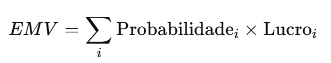

Onde:
* *i*: representa o Cenário Econômico
* Probabilidade: Risco do cenário se concretizar (0%, sem chances; e 100%, o cenário ocorrerá)
* Lucro: representa o impacto caso um cenário se concretize

In [22]:
# Dados do problema
probabilidade = [0.3, 0.5, 0.2]

cidades = ['Região A', 'Região B']

lucro = {'Região A': [120, 80, -40],
         'Região B': [100, 70, -10]}

# modelo irá maximizar o lucro
model = pulp.LpProblem("Expansao", pulp.LpMaximize)

#variáveis de decisão
x_A = pulp.LpVariable("Escolhe_A", cat="Binary")  # variável binária, 0 ou 1.
x_B = pulp.LpVariable("Escolhe_B", cat="Binary")

emv = {cidade: sum(p * l for p, l in zip(probabilidade, lucro[cidade])) for cidade in cidades}

model += emv['Região A'] * x_A + emv['Região B'] * x_B # modelo é a soma dos lucros, porém...
model += x_A + x_B == 1 # ... apenas uma região será escolhida

# resolve
model.solve()
# Dados do problema
probabilidade = [0.3, 0.5, 0.2]

cidades = ['Região A', 'Região B']

lucro = {'Região A': [120, 80, -40],
         'Região B': [100, 70, -10]}

# modelo irá maximizar o lucro
model = pulp.LpProblem("Expansao", pulp.LpMaximize)

#variáveis de decisão
x_A = pulp.LpVariable("Escolhe_A", cat="Binary")  # variável binária, 0 ou 1.
x_B = pulp.LpVariable("Escolhe_B", cat="Binary")

emv = {cidade: sum(p * l for p, l in zip(probabilidade, lucro[cidade])) for cidade in cidades}

model += emv['Região A'] * x_A + emv['Região B'] * x_B # modelo é a soma dos lucros, porém...
model += x_A + x_B == 1 # ... apenas uma região será escolhida

# resolve
model.solve()

# imprime a solução
print(f"{( 'Região A' if pulp.value(x_A) else 'Região B')} foi escolhida.")
print(f"Lucro esperado: R$ {((emv['Região A'] * x_A.value() + emv['Região B'] * x_B.value()) * 1000):.0f}")

Região A foi escolhida.
Lucro esperado: R$ 68000
